# Importing & Reading the data sets .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_excel("E://Project//Edited//staff utlz latest 16-17_masked.xlsx",header=1)
ter_data=pd.read_excel("E://Project//HR Analytics//Terminations 15-18.xlsx")
df1=pd.read_excel("E://Project//Edited//staff utlz latest 17-18_masked.xlsx",header=1)

In [3]:
col_sep=df.iloc[:,np.r_[0:11]]
col_sep1=df1.iloc[:,np.r_[0:11]]

ut_16_17=df.iloc[:,np.r_[0,-1]]
ut_17_18=df1.iloc[:,np.r_[0,-1]]



# Concat and merging data

In [4]:
col_full_merge=pd.merge(col_sep,col_sep1,on='Employee No',how="outer",suffixes=('_2016-17','_2017-18'))
col_full_merge.fillna(0.00,inplace=True)

ut_2016_18=pd.merge(ut_16_17,ut_17_18,on="Employee No",how="outer")

In [5]:
df2=col_sep[col_sep['Current Status'].isin(["Resigned"])]
df3=col_sep[col_sep["Employee No"].isin([5, 62, 96, 213, 248, 433])]


Duplicat=[90 ,136, 164 ,168 ,424, 518, 538, 684, 729 ]
df2.drop(df2[df2["Employee No"].isin(Duplicat)].index,inplace=True)

In [6]:
df4=pd.concat([df2,df3])

concat_data=pd.concat([col_sep1,df4])

final=pd.merge(concat_data,ut_2016_18,on="Employee No")

In [7]:
final.isna().sum()

Employee No                     0
Profit Center                   0
Employee Name                   0
Employee Position               0
Employee Location               0
People Group                    0
Employee Category               0
Supervisor name                 0
Join Date                       0
Current Status                  0
Month YearTermination Date    828
Utilization_16_17%            322
Utilization_17_18%            138
dtype: int64

In [8]:
# Filling NA values 
final["Month YearTermination Date"].fillna('2018-03-31 00:00:00',inplace=True)
final["Month YearTermination Date"].replace('-','2018-03-31 00:00:00',inplace=True)

ut_16_17['Utilization_16_17%'].fillna(0.00,inplace=True)
ut_16_17['Utilization_16_17%'].replace("-",0.00,inplace=True)

ut_17_18['Utilization_17_18%'].fillna(0.00,inplace=True)
ut_17_18['Utilization_17_18%'].replace("-",0.00,inplace=True)

final['Utilization_16_17%'].fillna(0.00,inplace=True)
final['Utilization_16_17%'].replace("-",0.00,inplace=True)
final['Utilization_17_18%'].fillna(0.00,inplace=True)
final['Utilization_17_18%'].replace("-",0.00,inplace=True)

In [9]:
final.head(2)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Month YearTermination Date,Utilization_16_17%,Utilization_17_18%
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,2018-03-31 00:00:00,0.352941,0.240279
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,2018-03-31 00:00:00,0.295165,0.386510


In [10]:
final.shape

(1111, 13)

In [11]:

col_level=pd.merge(col_sep[["Employee No",'Employee Position']],col_sep1[["Employee No",'Employee Position']],on='Employee No',how="outer",suffixes=('_2016-17','_2017-18'))


In [12]:
# Splitting data
split_16_17=col_level['Employee Position_2016-17'].str.split(" ",expand=True) 
col_level['Employee Position_2016-17']=split_16_17[1]

split_17_18=col_level['Employee Position_2017-18'].str.split(" ",expand=True) 
col_level['Employee Position_2017-18']=split_17_18[1]

col_level[col_level['Employee Position_2016-17'].isin(['A1','A2','A3'])]

,Employee No,Employee Position_2016-17,Employee Position_2017-18
33,34,A2,A2
38,39,A2,A2
62,63,A3,A3
63,64,A2,A2
228,229,A3,A3
461,462,A3,A3
486,487,A1,A1


In [13]:
# Replacing the column value.
col_level.replace('A1', '11',inplace=True)
col_level.replace('A2','12',inplace=True)
col_level.replace('A3','13',inplace=True)


In [14]:
col_level.isna().sum()


Employee No                    0
Employee Position_2016-17    322
Employee Position_2017-18    146
dtype: int64

In [15]:
col_level.fillna(0.00,inplace=True)

In [16]:
col_level['Employee Position_2016-17'] = col_level['Employee Position_2016-17'].astype(int)
col_level['Employee Position_2017-18'] = col_level['Employee Position_2017-18'].astype(int)

# Creating useful columns 

In [17]:
lis=[]
for i,j in zip(col_level['Employee Position_2017-18'] ,col_level['Employee Position_2016-17']):
    if i== 0:
        lis.append("Notice Period & Resigned")
    
    else:
       
        if (i-j)==0:
            lis.append("Not promoted")    
        
        elif (j-i)==-1:
            lis.append("Demotion")
        elif j==0:
            lis.append("New Joinner")
        
        else:
            lis.append("promotion")

            
final['Appraisal']=lis

In [18]:
final["Month YearTermination Date"]=pd.to_datetime(final["Month YearTermination Date"])
final["Join Date"]=pd.to_datetime(final["Join Date"])

final["Tenure"]=final["Month YearTermination Date"].sub(final["Join Date"],axis=0)

In [19]:
final["Tenure"]=final["Tenure"].astype("str")

final["Tenure"]=final["Tenure"].map(lambda x:x.split(" ")[0])

final["Tenure"]=final["Tenure"].astype(int)

final["Tenure"]=(final["Tenure"]/365).round(1)


In [20]:
final["Attrition"]=final["Current Status"].map({"Active":"no","Resigned":"yes","New Joiner":"no","Secondment":"yes","Sabbatical":"no"})

In [21]:
final.head(2)

,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,Month YearTermination Date,Utilization_16_17%,Utilization_17_18%,Appraisal,Tenure,Attrition
0,1,PC - 1,Rochette Jilleen,Level 1,Location 3,Client Service Staff,SVP/VP,Idalina Lauraine,2000-09-30,Active,2018-03-31,0.352941,0.240279,promotion,17.5,no
1,2,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,SVP/VP,Idalina Lauraine,1999-05-31,Active,2018-03-31,0.295165,0.386510,Not promoted,18.8,no


In [22]:
final.shape

(1111, 16)

In [23]:
final.isna().sum()

Employee No                   0
Profit Center                 0
Employee Name                 0
Employee Position             0
Employee Location             0
People Group                  0
Employee Category             0
Supervisor name               0
Join Date                     0
Current Status                0
Month YearTermination Date    0
Utilization_16_17%            0
Utilization_17_18%            0
Appraisal                     0
Tenure                        0
Attrition                     0
dtype: int64

In [24]:
ter_data=ter_data.rename(columns={"Employee Number":"Employee No"})

In [25]:
ter_data['Age']=(ter_data['Last Update Date'].dt.year)-(ter_data['YEAR of Birth'])

In [26]:
visual=pd.merge(ter_data,final,on="Employee No",how="left")

# Defining the useful columns

In [27]:
def util(col):
    if col<0.4:
        return '<50'
    elif col<0.6:
        return '<60'
    elif col<0.7:
        return '<70'
    elif col<0.8:
        return '<80'
    elif col<0.9:
        return '<90'
    elif col<1:
        return '<100'
    else:
        return 'grt 100'

In [28]:
def util2(col):
    if col<1:
        return '<1'
    elif col<2:
        return '<2'
    elif col<3:
        return '<3'
    elif col<4:
        return '<4'
    elif col<5:
        return '<5'
    elif col<6:
        return '<6'
    elif col<7:
        return '<7'
    elif col<8:
        return '<8'
    elif col<9:
        return '<9'
    elif col<10:
        return '<10'   
    else:
        return 'grt 10'

In [29]:
ut_16_17['Uti']=ut_16_17['Utilization_16_17%'].apply(util)
ut_17_18['Uti2']=ut_17_18['Utilization_17_18%'].apply(util)

ut_16_17["Attrition"]=df["Current Status"]
ut_17_18["Attrition"]=df1["Current Status"]

_Tenure_=final[final["Attrition"]=="yes"]
_Tenure_["ten"]=_Tenure_["Tenure"].apply(util2)


In [30]:
def graph(_len_,_X_,_data_,_Tital_,hue=None,order=None,v=0):
    sb.set(style="whitegrid")
    plt.figure(figsize=(8,6))
    total = float(len(_len_))
    plt.xticks(rotation=v)
    ax = sb.countplot(x=_X_,hue=hue, data=_data_,order=order)
    plt.title(_Tital_, fontsize=20)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

# Data visualization

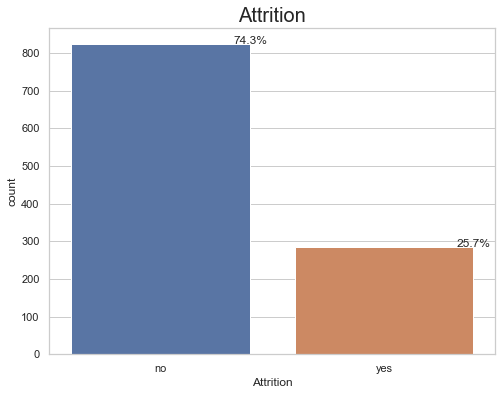

In [31]:
graph(final,'Attrition',final,'Attrition')

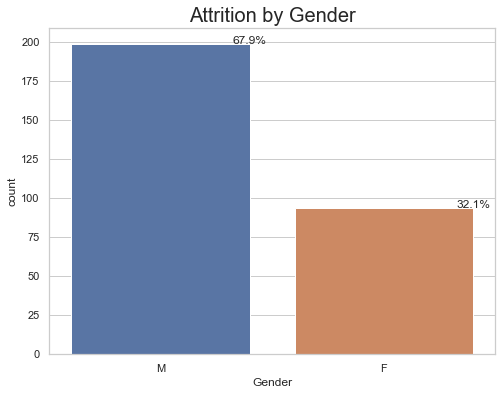

In [32]:
graph(visual,'Gender',visual,'Attrition by Gender')

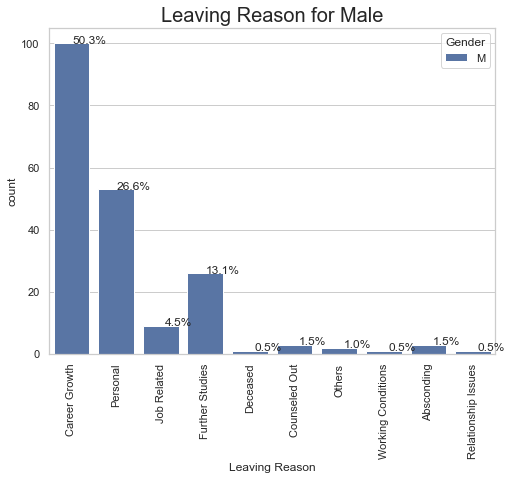

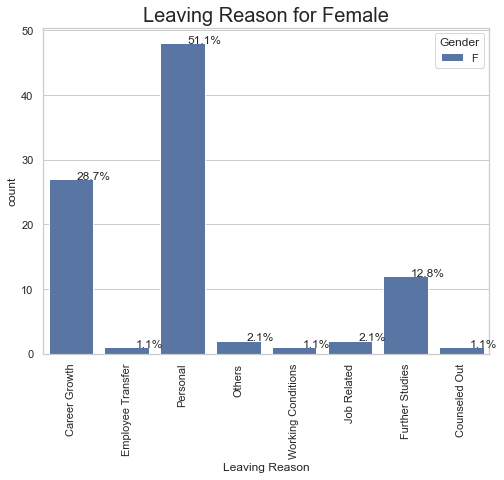

In [33]:
Male=visual[visual["Gender"]=="M"]
Female=visual[visual["Gender"]=="F"]
graph(Male,'Leaving Reason',Male,'Leaving Reason for Male',hue='Gender',v=90)
graph(Female,'Leaving Reason',Female,'Leaving Reason for Female',hue='Gender',v=90)

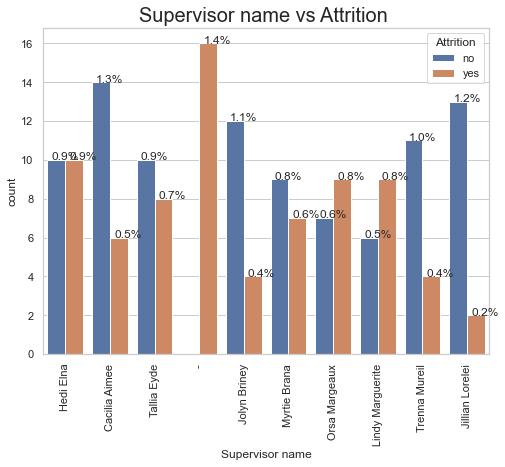

In [34]:
graph(final,'Supervisor name',final,'Supervisor name vs Attrition ',hue='Attrition',order=pd.value_counts(final['Supervisor name']).iloc[:10].index,v=90)

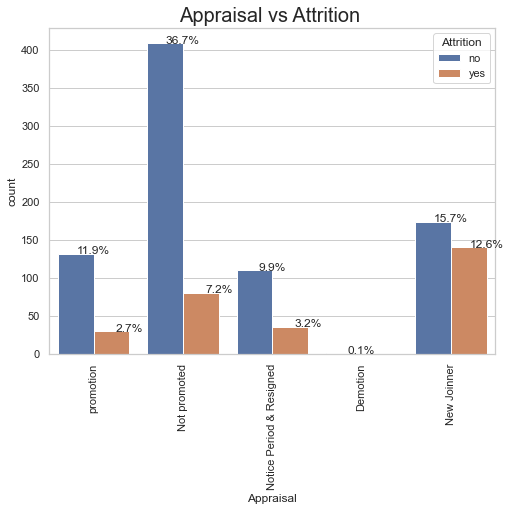

In [35]:
graph(final,'Appraisal',final,'Appraisal vs Attrition ',hue='Attrition',v=90)

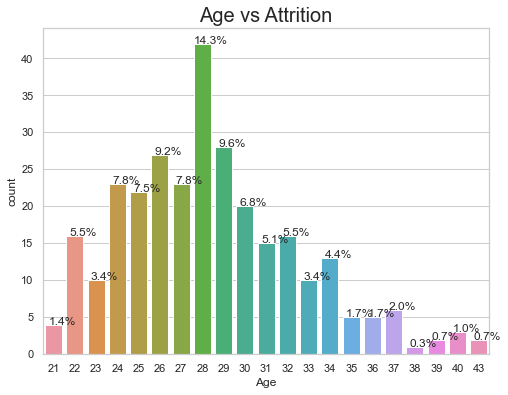

In [36]:
graph(visual,'Age',visual,"Age vs Attrition")

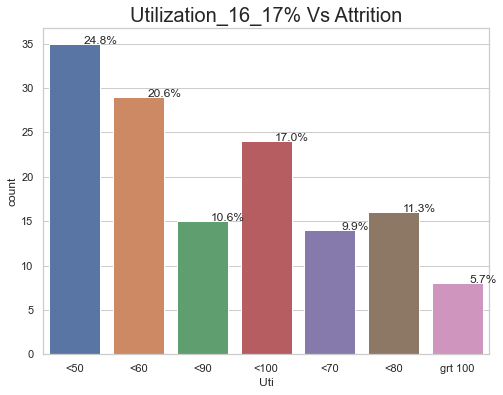

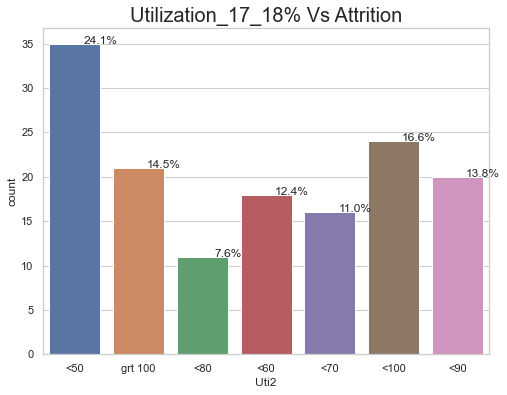

In [37]:
graph(ut_16_17[ut_16_17["Attrition"]=="Resigned"],'Uti',ut_16_17[ut_16_17["Attrition"]=="Resigned"],'Utilization_16_17% Vs Attrition')
graph(ut_17_18[ut_17_18["Attrition"]=="Resigned"],'Uti2',ut_17_18[ut_17_18["Attrition"]=="Resigned"],'Utilization_17_18% Vs Attrition')

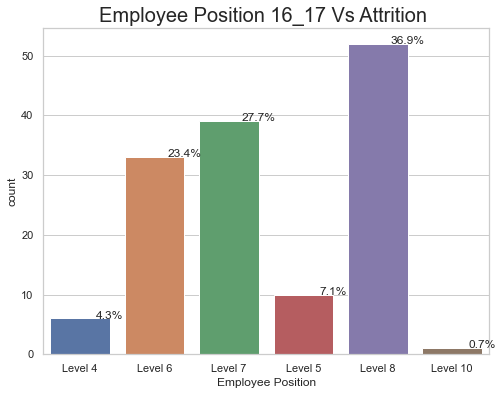

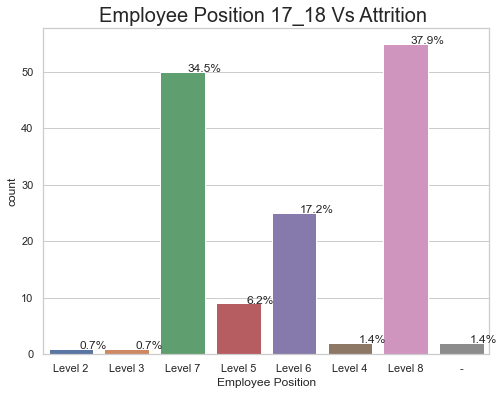

In [38]:
graph(df[df["Current Status"]=="Resigned"],"Employee Position",df[df["Current Status"]=="Resigned"],'Employee Position 16_17 Vs Attrition ')
graph(df1[df1["Current Status"]=="Resigned"],"Employee Position",df1[df1["Current Status"]=="Resigned"],'Employee Position 17_18 Vs Attrition ')

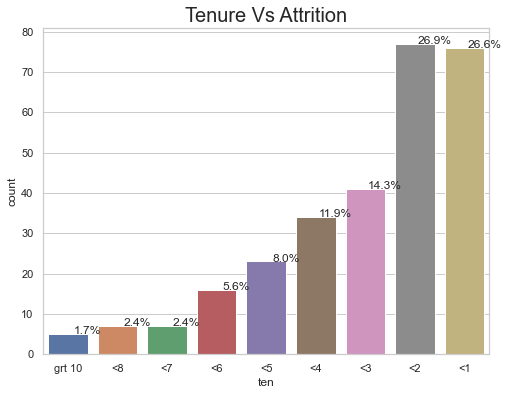

In [39]:
graph(_Tenure_,"ten",_Tenure_,"Tenure Vs Attrition")

In [40]:
final.columns

Index(['Employee No', 'Profit Center', 'Employee Name', 'Employee Position',
       'Employee Location', 'People Group', 'Employee Category',
       'Supervisor name', 'Join Date', 'Current Status',
       'Month YearTermination Date', 'Utilization_16_17%',
       'Utilization_17_18%', 'Appraisal', 'Tenure', 'Attrition'],
      dtype='object')

In [41]:
#Label Encoding.
for col in ['Employee Position','People Group','Supervisor name','Attrition','Employee Category','Profit Center',
            'Employee Location','Appraisal']:
    final[col] = (LabelEncoder().fit_transform(final[col])).astype('int')

    
final_2=final.copy()
    
#Droping colunms for Model generation  
final.drop(columns=['Employee No','Current Status','People Group','Join Date','Month YearTermination Date',"Employee Name"],axis=1,inplace=True)


<AxesSubplot:>

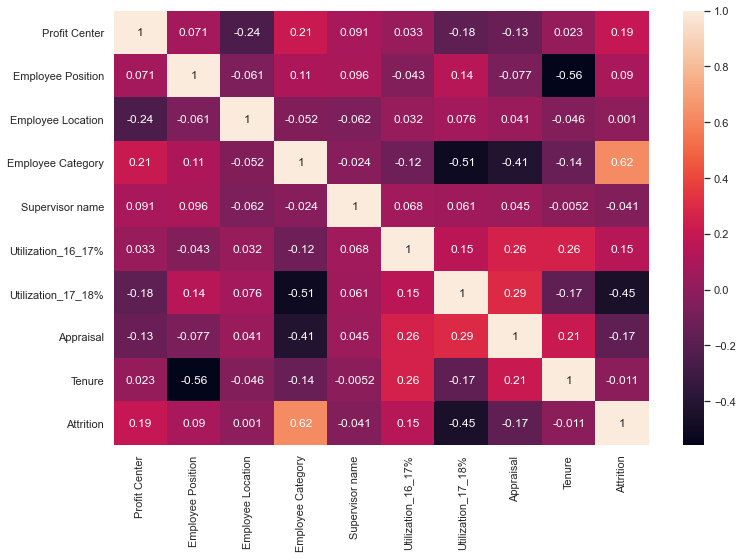

In [42]:
# correlation plot
plt.figure(figsize=(12,8))
sb.heatmap(final.corr(), annot=True)

In [43]:
# Splling data into training & testing .
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final.drop('Attrition',axis=1),final['Attrition'], test_size=0.30)

# Importing the Required packages

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics

# Model building

In [45]:
parameters_deci_c={
 'criterion': ['gini','entropy'],
 'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [233]}

parameters_knn_c={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
#     'algorithm':['auto','ball_tree','kd_tree','brute']
    
}
parameters_svc={
    'kernel': ['linear','poly','rbf','sigmoid'],
    'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    'probability':[True]
    
}
parameters_log_reg = {'penalty':['l1', 'l2', 'elasticnet'],
                      'solver':['newton-cg','lbfgs','liblinear','sag','saga']
                     }
parameters_rndf={
 'criterion': ["gini","entropy"],
 'n_estimators': list(np.arange(100,150)),
 'random_state': [246],
}

Accuracy  Score is :  85.32934131736528 %
[[219  21]
 [ 28  66]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       240
           1       0.76      0.70      0.73        94

    accuracy                           0.85       334
   macro avg       0.82      0.81      0.81       334
weighted avg       0.85      0.85      0.85       334

Best Parameters are :  {'penalty': 'l2', 'solver': 'lbfgs'}


 **************Area Under Curve*************


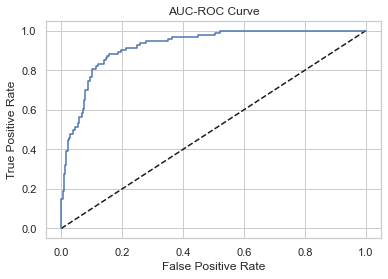

Cross Validation Score is : 0.8429723319110594
Model name is Pipeline(steps=[('LogisticRegression',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'liblinear', 'sag',
                                                     'saga']},
                              scoring='accuracy'))])
Accuracy  Score is :  93.41317365269461 %
[[231   9]
 [ 13  81]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       240
           1       0.90      0.86      0.88        94

    accuracy                           0.93       334
   macro avg       0.92      0.91      0.92       334
weighted avg       0.93      0.93      0.93       334

Best Parameters are :  {'n_neighbors': 6, 'weights': 'distance'}


 **************Area Under Cu

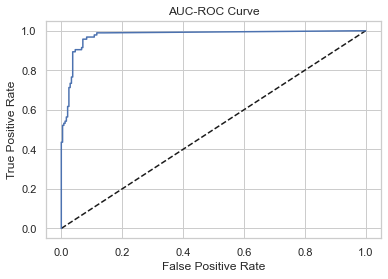

Cross Validation Score is : 0.8892878912357883
Model name is Pipeline(steps=[('KNeighborsClassifier',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [5, 6, 7, 8, 9],
                                          'weights': ['uniform', 'distance']},
                              scoring='accuracy'))])
Accuracy  Score is :  88.32335329341318 %
[[238   2]
 [ 37  57]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       240
           1       0.97      0.61      0.75        94

    accuracy                           0.88       334
   macro avg       0.92      0.80      0.83       334
weighted avg       0.89      0.88      0.87       334

Best Parameters are :  {'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 500, 'probability': True}


 **************Area Under Curve*************


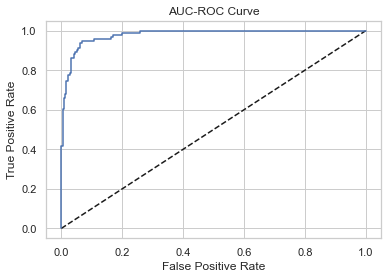

Cross Validation Score is : 0.8687322767868975
Model name is Pipeline(steps=[('SVC',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'gamma': ['auto', 'scale'],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid'],
                                          'max_iter': [500, 700],
                                          'probability': [True]},
                              scoring='accuracy'))])
Accuracy  Score is :  97.90419161676647 %
[[238   2]
 [  5  89]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       240
           1       0.98      0.95      0.96        94

    accuracy                           0.98       334
   macro avg       0.98      0.97      0.97       334
weighted avg       0.98      0.98      0.98       334

Best Parameters are :  {'criterion': 'gini', 'max_depth': 5, 'max_featur

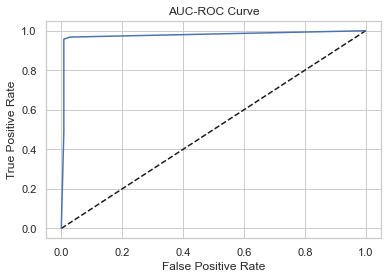

Cross Validation Score is : 0.9048379402644899
Model name is Pipeline(steps=[('DecisionTreeClassifier',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [5],
                                          'max_features': ['auto', 'sqrt'],
                                          'random_state': [233],
                                          'splitter': ['best', 'random']},
                              scoring='accuracy'))])
Accuracy  Score is :  99.40119760479041 %
[[240   0]
 [  2  92]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       240
           1       1.00      0.98      0.99        94

    accuracy                           0.99       334
   macro avg       1.00      0.99      0.99       334
weighted avg       0.99      0.99      0.99       334

Best Parameters are :  {'cr

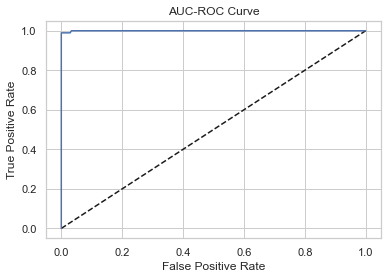

Cross Validation Score is : 0.983250735430525
Model name is Pipeline(steps=[('RandomForestClassifier',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'n_estimators': [100, 101, 102, 103,
                                                           104, 105, 106, 107,
                                                           108, 109, 110, 111,
                                                           112, 113, 114, 115,
                                                           116, 117, 118, 119,
                                                           120, 121, 122, 123,
                                                           124, 125, 126, 127,
                                                           128, 129, ...],
                                          'random_state': [246]},
                              scoring='accuracy'))])
Be

In [46]:
parameter_lis=[parameters_log_reg,parameters_knn_c,parameters_svc,parameters_deci_c,parameters_rndf]
models=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
models_name=['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier',"RandomForestClassifier"]
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,7),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='accuracy'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy  Score is : ',accuracy_score(y_test,pred)*100,'%')
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Best Parameters are : ',gsv[0].best_params_)
    print("\n\n **************Area Under Curve*************")
    y_pred_prob=gsv[0].predict_proba(X_test)[:,1]
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC Curve')
    plt.show()    
    print(f'Cross Validation Score is : {crv}\nModel name is {gsv}\n==============================================================================')
    if accuracy>best_score:
        best_score=accuracy
        best_model_name=[]
        best_model_name.append(gsv[0])
        
        
print(f"Best model name is :  {best_model_name[0]}")



    

0.9940119760479041
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       240
           1       1.00      0.98      0.99        94

    accuracy                           0.99       334
   macro avg       1.00      0.99      0.99       334
weighted avg       0.99      0.99      0.99       334

Confusion Matrix
[[240   0]
 [  2  92]]


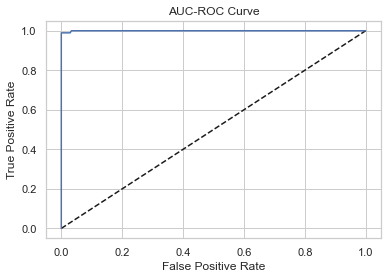

In [54]:
# Best Model after Tuning
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion= 'gini', n_estimators= 102, random_state= 246)
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

y_pred_rf= rf.predict(X_test)
print(metrics.classification_report(y_test,y_pred_rf))


print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rf))

y_pred_prob=rf.predict_proba(X_test)[:,1]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.show()    

# Creating new dataset

In [55]:
data={'Profit Center':[0,2,3,4,0,3,3],'Employee Position':[7,4,8,9,4,8,3],'Employee Location':[0,6,8,3,2,6,0],
      'Employee Category':[1,10,7,11,4,1,7],'Supervisor name':[113,54,69,28,114,33,57],'Utilization_16_17%':[0.9222,0.0232,0.9123,0.7621,0.45672,0.0000,0.2222],
      'Utilization_17_18%':[0.95243,0.73223,0.92234,0.0222,0.27312,0.6800,0.2323],'Appraisal':[1,0,3,3,1,0,2],'Tenure':[12.3,5.4,15.3,4.9,7.9,0.2,10.2]}

In [56]:
created_data = pd.DataFrame(data)

In [57]:
created_data

,Profit Center,Employee Position,Employee Location,Employee Category,Supervisor name,Utilization_16_17%,Utilization_17_18%,Appraisal,Tenure
0,0,7,0,1,113,0.92220,0.95243,1,12.3
1,2,4,6,10,54,0.02320,0.73223,0,5.4
2,3,8,8,7,69,0.91230,0.92234,3,15.3
3,4,9,3,11,28,0.76210,0.02220,3,4.9
4,0,4,2,4,114,0.45672,0.27312,1,7.9
5,3,8,6,1,33,0.00000,0.68000,0,0.2
6,3,3,0,7,57,0.22220,0.23230,2,10.2


In [58]:
y_pred_rf1= rf.predict(created_data)



In [59]:
y_pred_rf1  #0 for "No" & 1 for "Yes"

array([0, 0, 1, 0, 0, 0, 1])

In [60]:
created_data.iloc[[2,6],:] #possible attrition

,Profit Center,Employee Position,Employee Location,Employee Category,Supervisor name,Utilization_16_17%,Utilization_17_18%,Appraisal,Tenure
2,3,8,8,7,69,0.9123,0.92234,3,15.3
6,3,3,0,7,57,0.2222,0.23230,2,10.2
